# Imports

In [35]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [36]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

df = pd.concat([df_train.drop(['Survived'], axis=1), df_test], axis=0, sort=False)

# Data exploration

In [37]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data cleaning

In [38]:
# Remove the id, name, ticket columns

df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [39]:
# Cabin

# if the cabin is missing, replace it with 'X', otherwise extract the first letter of the cabin
df['Cabin_Letter'] = df['Cabin'].apply(lambda x: 'X' if pd.isnull(x) else x[0])

df.drop('Cabin', axis=1, inplace=True)

In [40]:
# Cabin letter correlation with class
df[['Cabin_Letter', 'Pclass']].groupby(['Cabin_Letter'], as_index=False).mean().sort_values(by='Pclass', ascending=True)

,Cabin_Letter,Pclass
0,A,1.000000
1,B,1.000000
2,C,1.000000
7,T,1.000000
3,D,1.130435
4,E,1.243902
5,F,2.380952
8,X,2.617357
6,G,3.000000


In [41]:
# get df_train from df
df_train = pd.concat([df[:len(df_train)], df_train['Survived']], axis=1, sort=False)
# Cabin letter correlation with survival
df_train[['Cabin_Letter', 'Survived']].groupby(['Cabin_Letter'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin_Letter,Survived
3,D,0.757576
4,E,0.750000
1,B,0.744681
5,F,0.615385
2,C,0.593220
6,G,0.500000
0,A,0.466667
8,X,0.299854
7,T,0.000000


In [42]:
# Medium survival rate for all passengers
df_train['Survived'].mean()

0.3838383838383838

It seems that people that had their cabin number registered were more likely to survive.
This can be explained by the fact that they don't have recovered the cabin number of many of the people that died.

In [43]:
# Cabin letter information is redundant with class, so we only make two classes: cabin mapped and cabin not mapped

df['Cabin_Mapped'] = df['Cabin_Letter'].apply(lambda x: 0 if x == 'X' else 1)

# Drop Cabin_Letter

df.drop('Cabin_Letter', axis=1, inplace=True)

In [44]:
# Missing Age
df['Age_Missing'] = df['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)

In [45]:
# get df_train from df
df_train = pd.concat([df[:len(df_train)], df_train['Survived']], axis=1, sort=False)
# Percentage of people with missing age that survived
df_train[df_train['Age_Missing'] == 1]['Survived'].mean()

0.2937853107344633

In [46]:
# Percentage of people with missing age and cabin that survived

df_train[(df_train['Age_Missing'] == 1) & (df_train['Cabin_Mapped'] == 0)]['Survived'].mean()

0.25949367088607594

In [47]:
# number of people with missing age and cabin

df_train[(df_train['Age_Missing'] == 1) & (df_train['Cabin_Mapped'] == 0)].shape[0]

158

Having a missing age and a missing cabin is an even better indicator than having just one of the two.

In [48]:
# Create a new feature: age missing and cabin missing
df['Age_Missing_Cabin_Missing'] = df.apply(lambda x: 1 if x['Age_Missing'] == 1 and x['Cabin_Mapped'] == 0 else 0, axis=1)

# drop the age missing column and the cabin mapped column

df.drop(['Age_Missing', 'Cabin_Mapped'], axis=1, inplace=True)

In [49]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Missing_Cabin_Missing
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,0
2,3,female,26.0,0,0,7.9250,S,0
3,1,female,35.0,1,0,53.1000,S,0
4,3,male,35.0,0,0,8.0500,S,0


In [50]:
# Create dummy variables for the categorical columns

df = pd.get_dummies(df)

In [51]:
# Number of missing values in each column of training data

missing_val_count_by_column = (df_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Age         177
Embarked      2
dtype: int64


In [52]:
# Number of missing values in each column of test data

missing_val_count_by_column = (df_test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Age       86
Fare       1
Cabin    327
dtype: int64


In [53]:
# Fill the missing values with the mean of the column

df = df.fillna(df.mean())

# Data visualization

In [54]:
# get df_train from df
df_train = pd.concat([df[:len(df_train)], df_train['Survived']], axis=1, sort=False)

In [55]:
df_train.head()

,Pclass,Age,SibSp,Parch,Fare,Age_Missing_Cabin_Missing,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,22.0,1,0,7.2500,0,0,1,0,0,1,0
1,1,38.0,1,0,71.2833,0,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,1,0,0,0,1,1
3,1,35.0,1,0,53.1000,0,1,0,0,0,1,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1,0


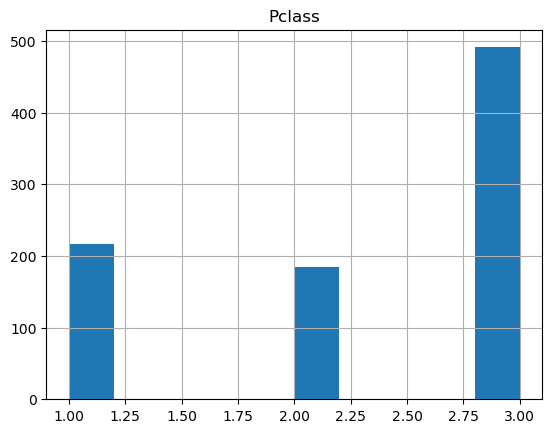

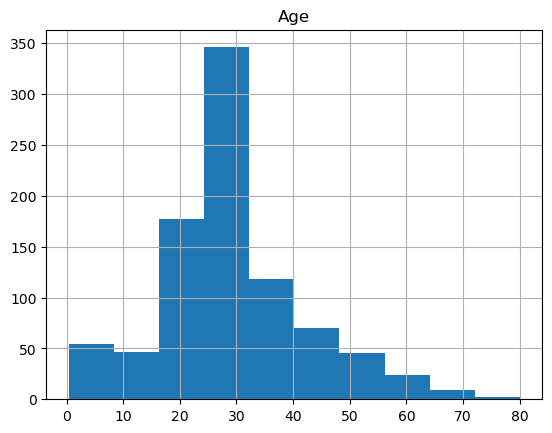

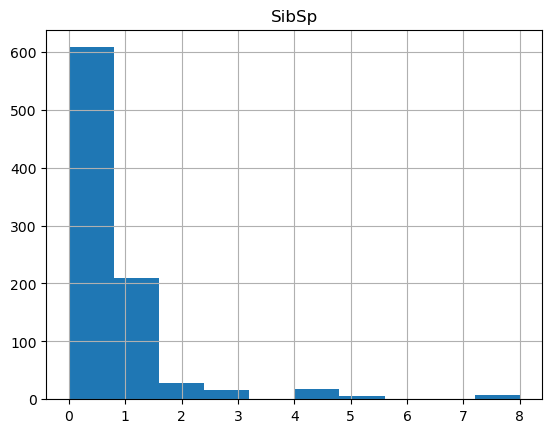

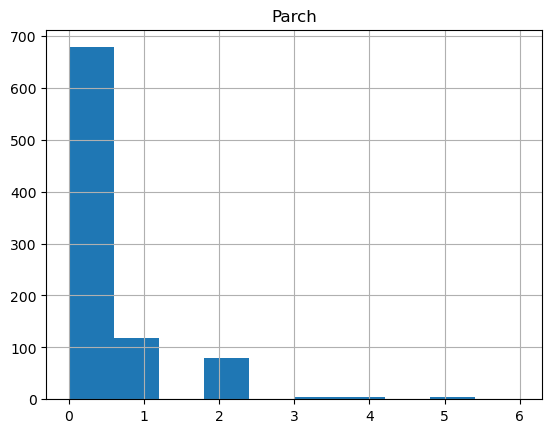

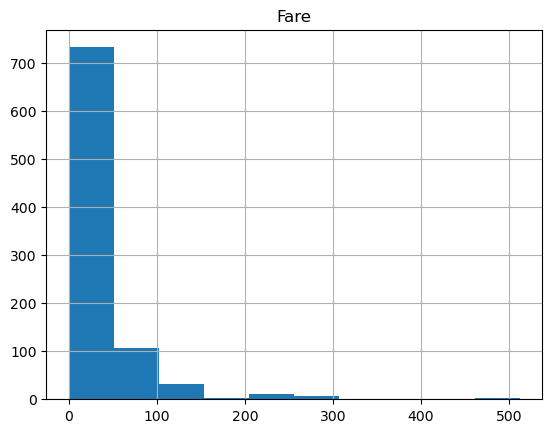

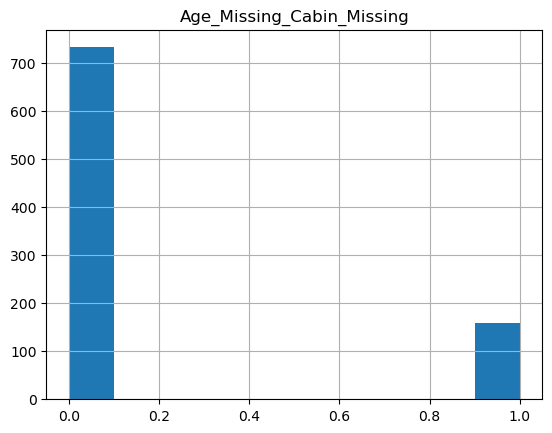

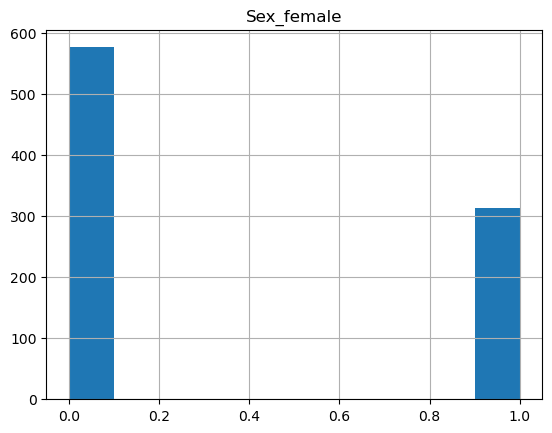

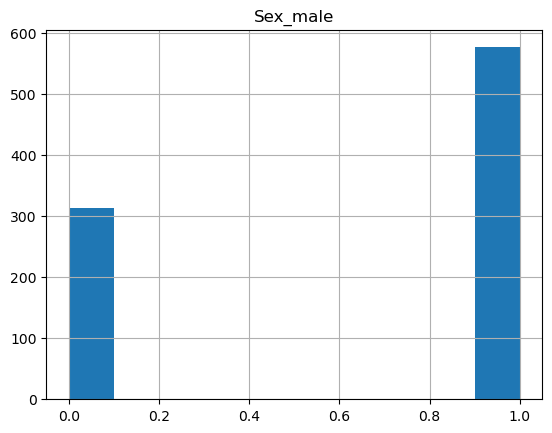

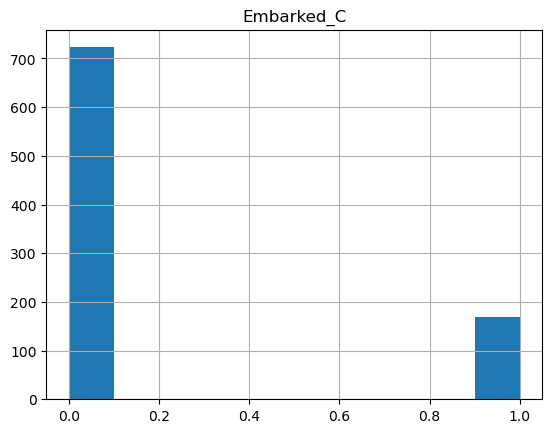

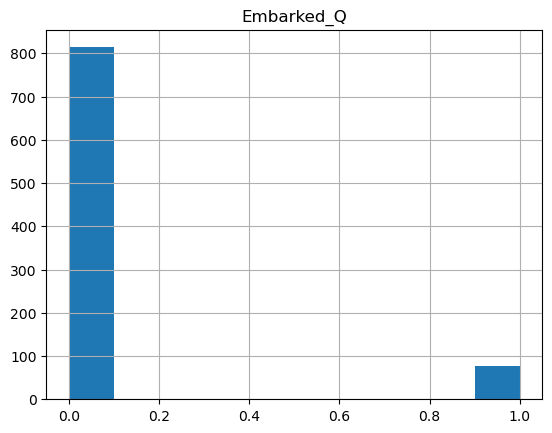

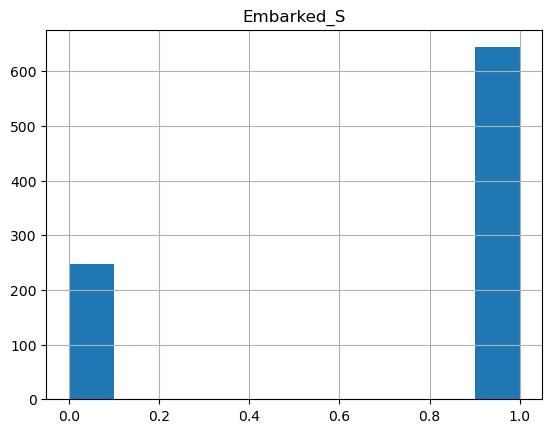

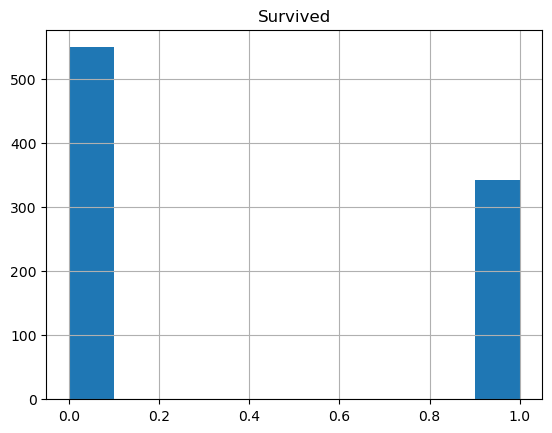

In [56]:
# Plot histograms of each column

for col in df_train.columns:
    df_train.hist(column=col)

<Axes: >

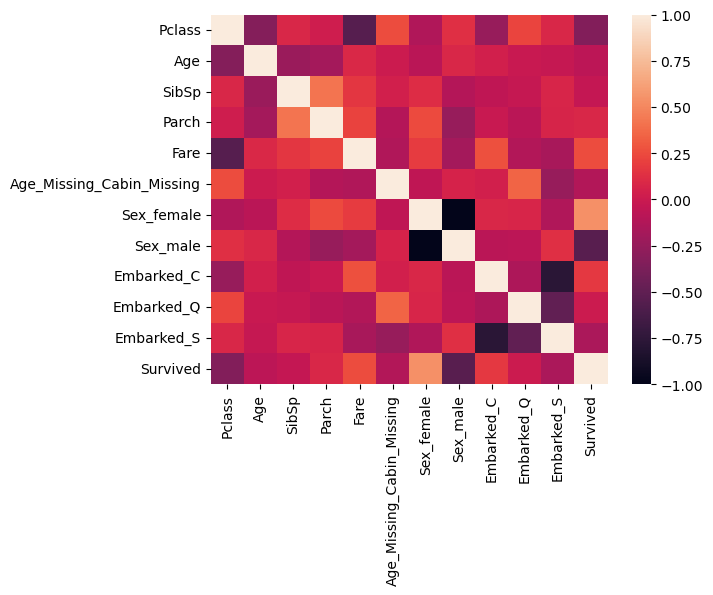

In [57]:
# Plot the correlation matrix

sns.heatmap(df_train.corr())

# Data modeling

In [58]:
# Split the data into training and validation sets

X = df_train.drop(['Survived'], axis=1)
Y = df_train['Survived']

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)

## Base model

In [59]:
# Create a baseline model

from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(solver='lbfgs', max_iter=1000)

In [60]:
# Train the model

logistic_regression.fit(X_train, Y_train)

logistic_regression.score(X_val, Y_val)

0.7541899441340782

## XGBoost

In [61]:
import xgboost as xgb

In [70]:
xgb_model = xgb.XGBClassifier(
    n_estimators=10000,
    max_depth=5,
    learning_rate=0.1,
    early_stopping_rounds=5,
)

In [71]:
# Train the model
xgb_model.fit(X_train, Y_train, eval_set=[(X_val, Y_val)])

[0]	validation_0-logloss:0.65167
[1]	validation_0-logloss:0.61798
[2]	validation_0-logloss:0.59014
[3]	validation_0-logloss:0.56725
[4]	validation_0-logloss:0.54687


[5]	validation_0-logloss:0.53038
[6]	validation_0-logloss:0.51667
[7]	validation_0-logloss:0.50488
[8]	validation_0-logloss:0.49458
[9]	validation_0-logloss:0.48589
[10]	validation_0-logloss:0.47882
[11]	validation_0-logloss:0.47016
[12]	validation_0-logloss:0.46352
[13]	validation_0-logloss:0.46020
[14]	validation_0-logloss:0.45512
[15]	validation_0-logloss:0.45120
[16]	validation_0-logloss:0.44882
[17]	validation_0-logloss:0.44656
[18]	validation_0-logloss:0.44335
[19]	validation_0-logloss:0.44234
[20]	validation_0-logloss:0.44223
[21]	validation_0-logloss:0.44139
[22]	validation_0-logloss:0.44046
[23]	validation_0-logloss:0.44003
[24]	validation_0-logloss:0.44078
[25]	validation_0-logloss:0.44044
[26]	validation_0-logloss:0.44186
[27]	validation_0-logloss:0.44197
[28]	validation_0-logloss:0.44206


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [72]:
# Test the model

xgb_model.score(X_val, Y_val)

0.8100558659217877

# Submission file

In [73]:
# Make predictions on the test set
df_test = df[df_train.shape[0]:]
predictions = xgb_model.predict(df_test)

In [74]:
# Save the predictions to a CSV file

output = pd.DataFrame({'PassengerId': pd.read_csv('data/test.csv').PassengerId, 'Survived': predictions})
pd.DataFrame.to_csv(output, 'data/predictions.csv', index=False)